# Reconhecimento de texto com EasyOCR

- Mantida por por [Jaided AI](https://jaided.ai/), uma empresa especializada em serviços de OCR
- Repositório oficial: https://github.com/JaidedAI/EasyOCR

In [1]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

# Configurações

In [2]:
idiomas = ['en', 'pt']
print(idiomas)

['en', 'pt']


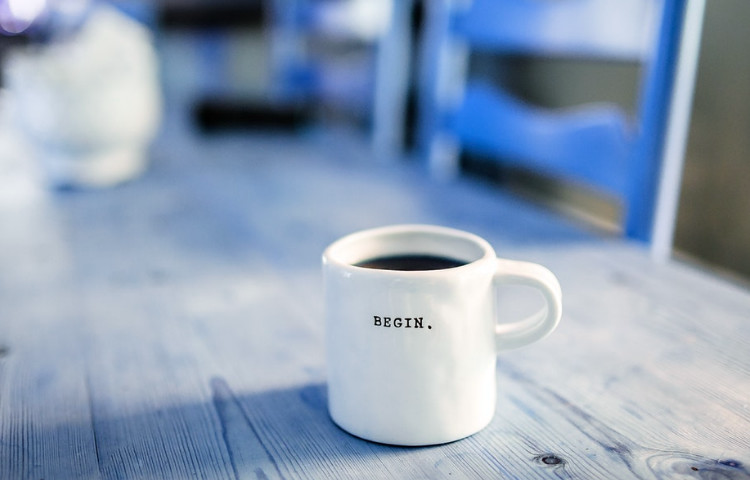

In [3]:
img = cv2.imread('../data/Imagens/caneca.jpg')
Image.fromarray(img)

In [4]:
original = img.copy()

# Reconhecimento (OCR)

In [5]:
reader = Reader(idiomas, gpu=False)
resultados = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [6]:
resultados

[([[np.int32(373), np.int32(313)],
   [np.int32(435), np.int32(313)],
   [np.int32(435), np.int32(331)],
   [np.int32(373), np.int32(331)]],
  'BEGIN .',
  np.float64(0.6404368573907786))]

In [7]:
resultados[0][0]

[[np.int32(373), np.int32(313)],
 [np.int32(435), np.int32(313)],
 [np.int32(435), np.int32(331)],
 [np.int32(373), np.int32(331)]]

# Escrevendo os resultados na imagem

## Texto

In [8]:
fonte = '../data/Fontes/calibri.ttf'

In [9]:
def escreve_texto(texto, x, y, img, fonte, cor=(50,50,255), tamanho = 22):
  fonte = ImageFont.truetype(fonte, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img

## Caixa delimitadora

Cantos da bounding box:
* **te** = topo esquerdo (superior esquerdo)
* **td** = topo direito (superior direito)
* **bd** = baixo direito (inferior direito)
* **be** = baixo esquerdo (inferior esquerdo)

In [10]:
def coordenada_caixa(caixa):
  (te, td, bd, be) = caixa
  te = (int(te[0]), int(te[1]))
  td = (int(td[0]), int(td[1]))
  bd = (int(bd[0]), int(bd[1]))
  be = (int(be[0]), int(be[1]))
  return te, td, bd, be

In [11]:
coordenada_caixa(resultados[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [12]:
def desenha_caixa(img, te, bd, cor_caixa=(200,255,0), espessura=2):
  cv2.rectangle(img, te, bd, cor_caixa, espessura)
  return img

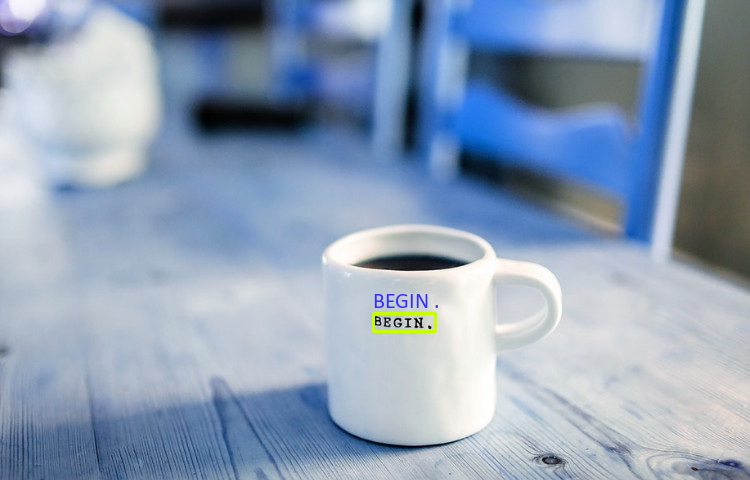

In [13]:
img = original.copy()

for (caixa, texto, probabilidade) in resultados:
  #print(caixa, texto, probabilidade)
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)

Image.fromarray(img)

Using CPU. Note: This module is much faster with a GPU.


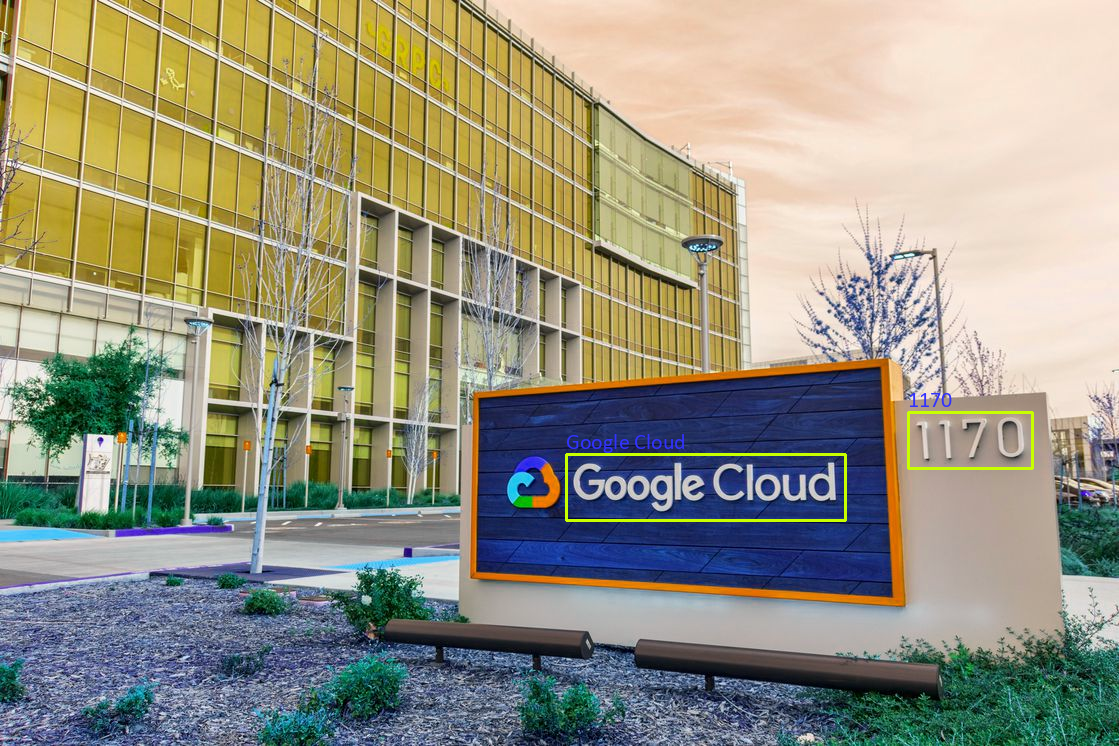

In [14]:
img = cv2.imread('../data/Imagens/google-cloud.jpg')
reader = Reader(idiomas, gpu=False)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)

Image.fromarray(img)

# Outros idiomas

- Outros idiomas [veja aqui](https://www.jaided.ai/easyocr/)

In [15]:
lista_idiomas = 'en,fr'
idiomas = lista_idiomas.split(',')
idiomas

['en', 'fr']

In [16]:
img = cv2.imread('../data/Imagens/frances.jpg')
reader = Reader(idiomas)
resultados = reader.readtext(img)
resultados

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(216), np.int32(122)],
   [np.int32(370), np.int32(122)],
   [np.int32(370), np.int32(170)],
   [np.int32(216), np.int32(170)]],
  'Mairie du /"',
  np.float64(0.8551352150131141)),
 ([[np.int32(257), np.int32(222)],
   [np.int32(378), np.int32(222)],
   [np.int32(378), np.int32(272)],
   [np.int32(257), np.int32(272)]],
  '[Palais du',
  np.float64(0.9349514190923051)),
 ([[np.int32(242), np.int32(322)],
   [np.int32(515), np.int32(322)],
   [np.int32(515), np.int32(376)],
   [np.int32(242), np.int32(376)]],
  'LES ARTS DÉCORATIFS',
  np.float64(0.9857393600746178)),
 ([[np.int32(262), np.int32(440)],
   [np.int32(481), np.int32(440)],
   [np.int32(481), np.int32(492)],
   [np.int32(262), np.int32(492)]],
  'Musée du LOUVRE',
  np.float64(0.994997176401167)),
 ([[np.int32(197), np.int32(537)],
   [np.int32(282), np.int32(537)],
   [np.int32(282), np.int32(577)],
   [np.int32(197), np.int32(577)]],
  'Théâtre',
  np.float64(0.9996403801903576)),
 ([[np.int32(195), np.int32(

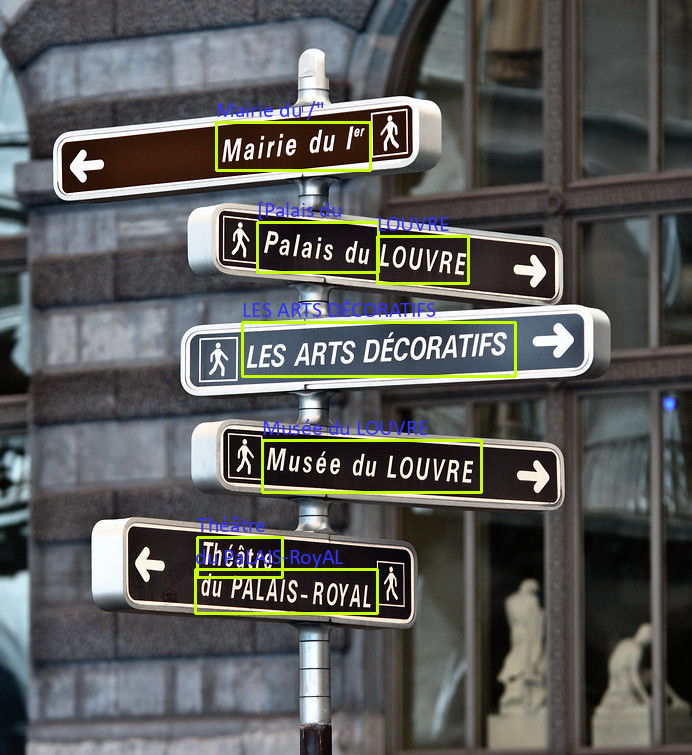

In [17]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)

Image.fromarray(img)

In [18]:
lista_idiomas = 'en,ch_sim'
idiomas = lista_idiomas.split(',')
idiomas

['en', 'ch_sim']

In [19]:
fonte = '../data/Front/simsun.ttc'

In [20]:
img = cv2.imread('../data/Imagens/chines.jpg')
reader = Reader(idiomas)
resultados = reader.readtext(img)
resultados

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(86), np.int32(80)],
   [np.int32(134), np.int32(80)],
   [np.int32(134), np.int32(128)],
   [np.int32(86), np.int32(128)]],
  '西',
  np.float64(0.8046873017200973)),
 ([[np.int32(187), np.int32(75)],
   [np.int32(469), np.int32(75)],
   [np.int32(469), np.int32(165)],
   [np.int32(187), np.int32(165)]],
  '愚园路',
  np.float64(0.961498744742133)),
 ([[np.int32(517), np.int32(81)],
   [np.int32(565), np.int32(81)],
   [np.int32(565), np.int32(123)],
   [np.int32(517), np.int32(123)]],
  '东',
  np.float64(0.9945212748108503)),
 ([[np.int32(78), np.int32(126)],
   [np.int32(136), np.int32(126)],
   [np.int32(136), np.int32(156)],
   [np.int32(78), np.int32(156)]],
  '315',
  np.float64(0.999993117451632)),
 ([[np.int32(514), np.int32(124)],
   [np.int32(574), np.int32(124)],
   [np.int32(574), np.int32(156)],
   [np.int32(514), np.int32(156)]],
  '309',
  np.float64(0.9923930764198303)),
 ([[np.int32(81), np.int32(175)],
   [np.int32(125), np.int32(175)],
   [np.int32(125), np.

In [21]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)

Image.fromarray(img)

OSError: cannot open resource

# Texto com fundo

In [22]:
def fundo_texto(texto, x, y, img, fonte, tamanho=32, cor_fundo=(200,255,0)):
  fundo = np.full((img.shape), (0,0,0), dtype=np.uint8)
  texto_fundo = escreve_texto(texto, x, y, fundo, fonte, tamanho=tamanho)
  texto_fundo = cv2.dilate(texto_fundo,(np.ones((3,5),np.uint8)))
  fx,fy,fw,fh = cv2.boundingRect(texto_fundo[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), cor_fundo, -1)
  return img

In [23]:
fonte = '../data/Font/calibri.ttf'
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')

In [24]:
img = cv2.imread('../data/Imagens/placa-infos.jpg')
reader = Reader(idiomas)
resultados = reader.readtext(img)
resultados

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(260), np.int32(164)],
   [np.int32(302), np.int32(164)],
   [np.int32(302), np.int32(196)],
   [np.int32(260), np.int32(196)]],
  '310',
  np.float64(0.9998774915879793)),
 ([[np.int32(344), np.int32(184)],
   [np.int32(368), np.int32(184)],
   [np.int32(368), np.int32(212)],
   [np.int32(344), np.int32(212)]],
  'i',
  np.float64(0.6660503442874557)),
 ([[np.int32(134), np.int32(262)],
   [np.int32(180), np.int32(262)],
   [np.int32(180), np.int32(290)],
   [np.int32(134), np.int32(290)]],
  'Cine',
  np.float64(0.9995354413986206)),
 ([[np.float64(304.07944680100655), np.float64(128.69533616120788)],
   [np.float64(366.51745895966945), np.float64(117.36831363725129)],
   [np.float64(369.92055319899345), np.float64(145.30466383879212)],
   [np.float64(307.48254104033055), np.float64(155.6316863627487)]],
  'União',
  np.float64(0.9999783552942619)),
 ([[np.float64(202.01488842937005), np.float64(155.701488842937)],
   [np.float64(304.70640266490693), np.float64(133.705633

In [25]:
cor_fonte = (0,0,0)
cor_fundo = (200,255,0)
cor_caixa = (200,255,0)
tamanho_fonte = 18

In [26]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd, cor_caixa)
  img = fundo_texto(texto, te[0], te[1], img, fonte, tamanho_fonte, cor_fundo)
  img = escreve_texto(texto, te[0], te[1], img, fonte, cor_fonte, tamanho_fonte)

Image.fromarray(img)

OSError: cannot open resource